In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings
import processing_module as pm

In [2]:
my_path = os.path.abspath("") + "/.."

Создадим две синтетические последовательности из распределения Парето с разными параметрами.
Функция распределения Парето:
$$
F(x) = 1 - \left(\frac{x_m}{x}\right)^k, \quad x \geq x_m,
$$
где $x_m$ - минимальное значение, а $k$ - параметр формы.

Для тестов сконкатенируем последовательности

In [3]:
x_m1, k_1 = 3., 2.  # форма и режим
x_m2, k_2 = 8., 4.

s1 = (np.random.pareto(x_m1, 1000) + 1) * k_1
s2 = (np.random.pareto(x_m2, 1000) + 1) * k_2

X_1 = np.concatenate((s1, s2), axis=0)
X_2 = np.concatenate((s1, s2[:100]), axis=0)

print(len(X_1))
print(len(X_2))

2000
1100


In [4]:
def plot_est_bs(input, name='Hill'):
    val_mean = input[0]
    val_dn = input[1]
    val_up = input[2] 
    legend = []
    n = len(val_mean)

    k_find = pm.eye_ball(val_mean)
    print(k_find)
    y = val_mean[k_find]
    x = np.arange(val_up.size)
    
    plt.plot(val_mean)    
    legend.append(f"{name}'s plot")
    
    plt.axhline(y, color = 'r', linestyle="--")
    legend.append(f"Интервал стабильности")
    print(f"{y} Интервал стабильности")
    plt.plot(x, val_up, 'k--')
    plt.plot(x, val_dn, 'k--')

    plt.ylim(np.min(val_dn[int(n/20):]), np.max(val_up[:int(n*0.95)]))
    
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(name) #Подпись для оси y
    plt.legend(legend, loc="upper left")
    plt.title(f"{name}'s estimator с доверительным интервалом") #Название
    plt.savefig(my_path + "/Text" + '/Imagines' + '/' + name)
    
    plt.show()

In [5]:
interval = 0.9
output_1 = pm.bootstrap_est(s1, interval, func=pm.hill)
output_2 = pm.bootstrap_est(s2, interval, func=pm.hill)

0.03202784731958449
21
0.24586260697039666 Интервал стабильности


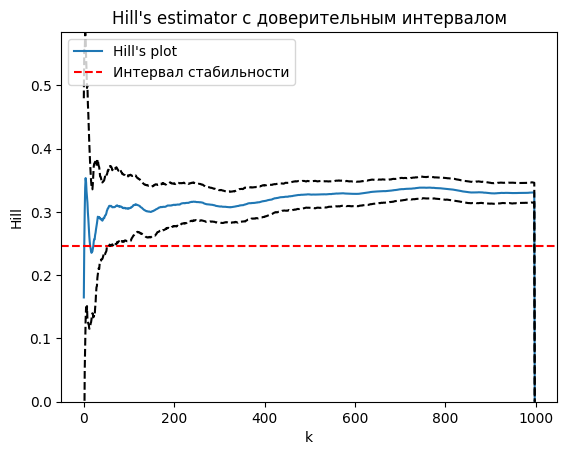

0.012741773777136587
31
0.13208696062813385 Интервал стабильности


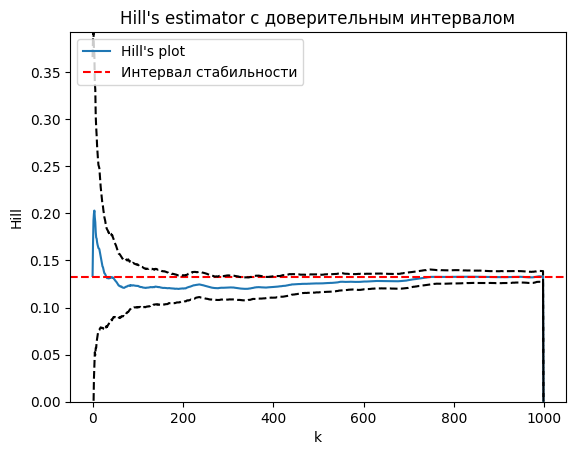

In [6]:
plot_est_bs(output_1, name='Hill')
plot_est_bs(output_2, name='Hill')

0.012741773777136587
31
0.13208696062813385 Интервал стабильности


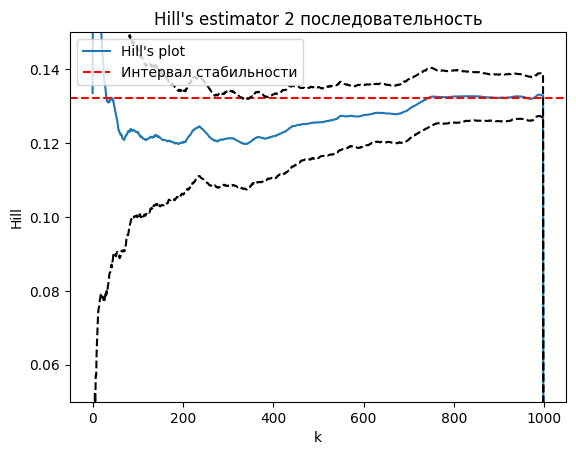

In [7]:
def plot_est_bs_1(input, name='Hill'):
    val_mean = input[0]
    val_dn = input[1]
    val_up = input[2] 
    legend = []
    n = len(val_mean)

    k_find = pm.eye_ball(val_mean)
    print(k_find)
    y = val_mean[k_find]
    x = np.arange(val_up.size)
    
    plt.plot(x, val_mean)    
    legend.append(f"{name}'s plot")
    
    plt.axhline(y, color = 'r', linestyle="--")
    legend.append(f"Интервал стабильности")
    print(f"{y} Интервал стабильности")
    plt.plot(x, val_up, 'k--')
    plt.plot(x, val_dn, 'k--')

    # plt.ylim(np.min(val_dn[int(n/20):]), np.max(val_up[:int(n*0.95)]))
    plt.ylim(0.05, 0.15)
    
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(name) #Подпись для оси y
    plt.legend(legend, loc="upper left")
    plt.title(f"{name}'s estimator 2 последовательность") #Название
    plt.savefig(my_path + "/Text" + '/Imagines' + '/Hill_seq_2')
    plt.show()

plot_est_bs_1(output_2, name='Hill')

<span style="color:orange">
    
## Global estimator ##

Виден срез

0.006875637076027431
0.018165331445686557
0.012449373264817919
0.009082081613426794
0.0025113043881365258


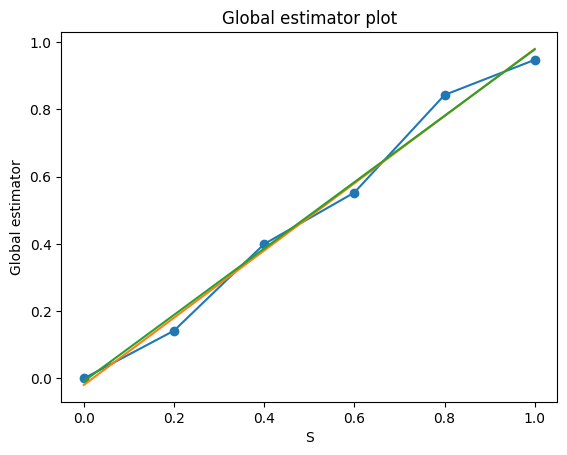

In [11]:
list_step, list_tt = pm.test_tail_index(X_1)
half = len(list_step) // 2

plt.plot(list_step, list_tt, 'o-')

z = np.polyfit(list_step[:half], list_tt[:half], 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))

z = np.polyfit(list_step[half:], list_tt[half:], 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))

plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
plt.savefig(my_path + "/Text" + '/Imagines' + '/global_est')
plt.show()

<span style="color:orange">

### Тест Phillips and Loretan для разных последовательностей ###


In [12]:
Num_1 = pm.phillips_loretan(s1, s2)
Num_2 = pm.phillips_loretan(X_1, X_2)

print(pm.phillips_loretan(s1, s2))
print(pm.phillips_loretan(s1, X_2))
print(pm.phillips_loretan(X_1, X_2))

0.016490202894830688


TypeError: cannot unpack non-iterable numpy.int64 object

In [ ]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange (0, 20, 0.001)
legend = []

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=1))
legend.append("График")

plt.axvline(x=3.841, color="red")
legend.append("граница 5%")

plt.axvline(x=Num_1, color="blue")
legend.append("s1 s2")

plt.axvline(x=Num_2, color="green")
legend.append("X_1, X_2")

plt.legend(legend, loc="upper right")
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.xlabel('X') #Подпись для оси х
plt.ylabel('Y') #Подпись для оси y
plt.title('Phillips and Loretan test') #Название
plt.show()

<span style="color:orange">

## Последовательности образованные Preferential Attachment ##
Начальные условия PA для столбцов следующие:
| столбец | \alpha | \beta | \gamma |
|---------|--------|-------|--------|
| 1       | 0.3  | 0.6  | 0.1   |
| 2       | 0.4  | 0.2  | 0.4   |
| 3       | 0.1  | 0.8  | 0.1   |

Каждое значение - услованая вероятность.


In [ ]:
my_path = os.path.abspath("") + "/.."
data = pd.read_csv(my_path + "/Data_initial" + '/p-k.csv', delimiter=',')

In [ ]:
print(data)

In [ ]:
def plot_est(Data, label='Data'):
    legend = []
    n = len(Data)
    
    y, k_find = pm.eye_ball(Data)
    
    plt.plot(np.arange(1, len(Data)+1), Data)
    plt.axhline(y, color = 'r', linestyle = '-')
    
    print(y)
    plt.ylim(np.min(Data[int(n/10):]), np.max(Data[:int(n*0.9)]))
    
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(label + '(k)') #Подпись для оси y
    plt.title(label) #Название
    legend.append(label)
    legend.append(f"{label} stability={y}")
    plt.legend(legend, loc="upper left")
    
    # plt.savefig(my_path + "/Text" + '/Imagines' + '/' + label)
    plt.show()

In [ ]:
seq_1 = data['1']
seq_2 = data['2']
seq_3 = data['3']

gammah1 = pm.hill(seq_1)
gammah2 = pm.hill(seq_2)
gammah3 = pm.hill(seq_3)

In [ ]:
interval = 0.9
output_1 = pm.bootstrap_est(seq_1, interval, func=pm.hill)
output_2 = pm.bootstrap_est(seq_2, interval, func=pm.hill)
output_3 = pm.bootstrap_est(seq_3, interval, func=pm.hill)

In [ ]:
plot_est_bs(output_1, name='Hill')
plot_est_bs(output_2, name='Hill')
plot_est_bs(output_3, name='Hill')

In [ ]:
Num_1 = pm.phillips_loretan(seq_1, seq_2)
Num_2 = pm.phillips_loretan(seq_1, seq_3)
Num_3 = pm.phillips_loretan(seq_2, seq_3)
print('seq_1, seq_2', Num_1)
print('seq_1, seq_3', Num_2)
print('seq_2, seq_3', Num_3)

In [ ]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange (0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=1)) 
plt.axvline(x=3.841, color="red")
plt.axvline(x=Num_1, color="blue")
plt.axvline(x=Num_2, color="green")
plt.axvline(x=Num_3, color="orange")

plt.xlim(0, 12)
plt.ylim(0, 2)
plt.xlabel('X') #Подпись для оси х
plt.ylabel('Y') #Подпись для оси y
plt.title('Phillips and Loretan test') #Название
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_1, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_2, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_3, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

<span style="color:orange">

## Последовательности образованные Preferential Attachment 2 ##

Образованы на данных от 6 июня


In [ ]:
my_path = os.path.abspath("") + "/.."
data_2 = pd.read_csv(my_path + "/Data_initial" + '/p-k_2.csv', delimiter=',')

In [ ]:
print(data_2)

In [ ]:
seq_1 = data_2['1']
seq_2 = data_2['2']
seq_3 = data_2['3']

gammah1 = pm.hill(seq_1)
gammah2 = pm.hill(seq_2)
gammah3 = pm.hill(seq_3)

In [ ]:
interval = 0.9
output_1 = pm.bootstrap_est(seq_1, interval, func=pm.hill)
output_2 = pm.bootstrap_est(seq_2, interval, func=pm.hill)
output_3 = pm.bootstrap_est(seq_3, interval, func=pm.hill)

In [ ]:
plot_est_bs(output_1, name='Hill')
plot_est_bs(output_2, name='Hill')
plot_est_bs(output_3, name='Hill')

In [ ]:
Num_1 = pm.phillips_loretan(seq_1, seq_2)
Num_2 = pm.phillips_loretan(seq_1, seq_3)
Num_3 = pm.phillips_loretan(seq_2, seq_3)
print('seq_1, seq_2', Num_1)
print('seq_1, seq_3', Num_2)
print('seq_2, seq_3', Num_3)

In [ ]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange (0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=1)) 
plt.axvline(x=3.841, color="red")
plt.axvline(x=Num_1, color="blue")
plt.axvline(x=Num_2, color="green")
plt.axvline(x=Num_3, color="orange")

plt.xlim(0, 12)
plt.ylim(0, 2)
plt.xlabel('X') #Подпись для оси х
plt.ylabel('Y') #Подпись для оси y
plt.title('Phillips and Loretan test') #Название
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_1, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_2, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_3, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()